<a href="https://colab.research.google.com/github/Michaelzats/Picking-the-best-day-to-invest/blob/main/STOCKS_ANALYSIS_BEST_DAYS_TO_BUY.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
url = 'https://launchpad.net/~mario-mariomedina/+archive/ubuntu/talib/+files'
!wget $url/libta-lib0_0.4.0-oneiric1_amd64.deb -qO libta.deb
!wget $url/ta-lib0-dev_0.4.0-oneiric1_amd64.deb -qO ta.deb
!dpkg -i libta.deb ta.deb
!pip install ta-lib
#import talib

Selecting previously unselected package libta-lib0.
(Reading database ... 120500 files and directories currently installed.)
Preparing to unpack libta.deb ...
Unpacking libta-lib0 (0.4.0-oneiric1) ...
Selecting previously unselected package ta-lib0-dev.
Preparing to unpack ta.deb ...
Unpacking ta-lib0-dev (0.4.0-oneiric1) ...
Setting up libta-lib0 (0.4.0-oneiric1) ...
Setting up ta-lib0-dev (0.4.0-oneiric1) ...
Processing triggers for man-db (2.10.2-1) ...
Processing triggers for libc-bin (2.35-0ubuntu3.1) ...
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 266.4/266.4 kB 4.0 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for ta-lib: filename=TA_Lib-0.4.27-cp310-cp310-linux_x86_64.whl size=1570186 sha256=af764921c1c870392e76e6e0f473c74aa8d9bbcc6cdcb24617b813a431ff8c7e
  Stored in directory: /root/.cache/pip/wheels/cc/d2/af/ede6

Average Return by Day Throughout the Years
Average Return by Week of the Month
Average Return by Month of the Month

The month with the lowest average return for the asset is: 12
The week of the month with the lowest average return for the asset is: 3.0
The day of the month with the lowest average return for the asset is: 10
The identified month is the lowest return month in 28.57142857142857% of the years.


<ipython-input-8-b3b51463a563>:62: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  for month in hist.index.to_period('M').unique():
<ipython-input-8-b3b51463a563>:63: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  hist_month = hist[hist.index.to_period('M') == month]


The identified week is the lowest return week in 26.47058823529412% of the months.
The identified day is the lowest return day in 3.225806451612903% of the days.


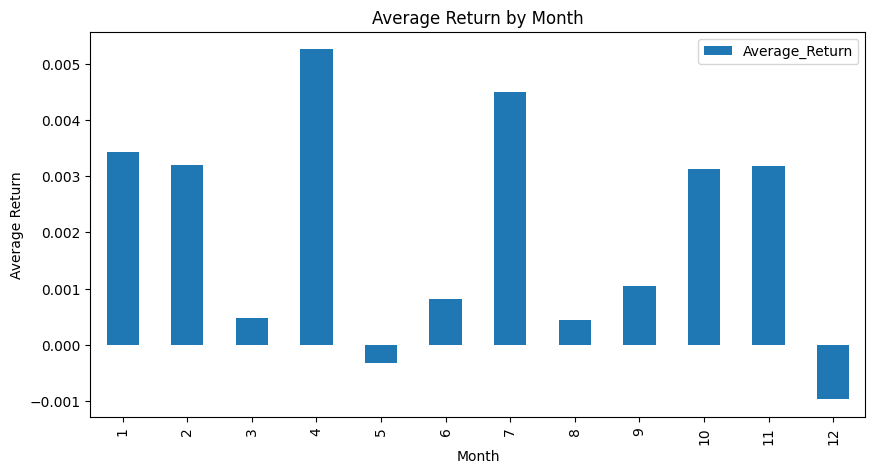

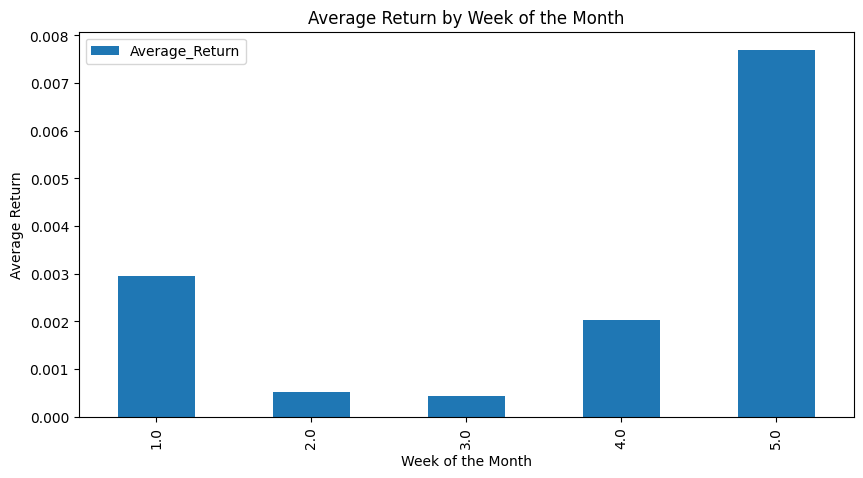

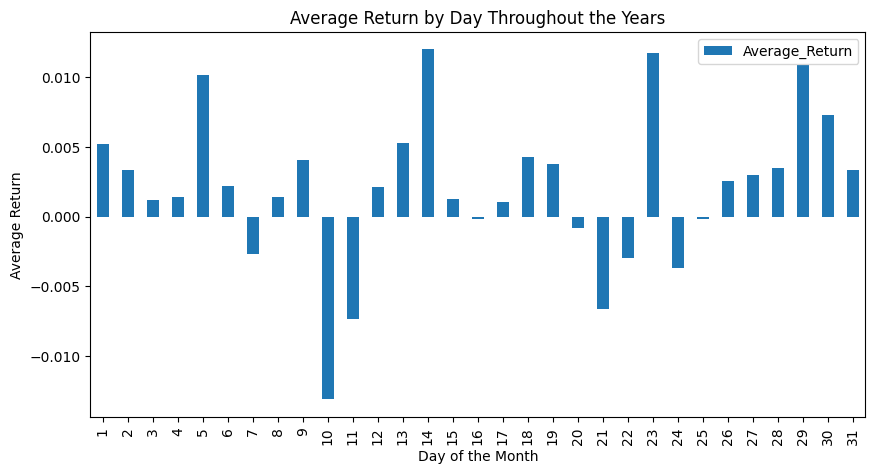

In [ ]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import numpy as np

# Define start and end dates
start_date = '1950-01-01'
end_date = '2023-07-01'

# Fetch historical data
btc = yf.Ticker("ETH-USD")
hist = btc.history(start=start_date, end=end_date)

# Calculate daily returns
hist['Return'] = hist['Close'].pct_change()

# Remove outliers based on the IQR
Q1 = hist['Return'].quantile(0.25)
Q3 = hist['Return'].quantile(0.75)
IQR = Q3 - Q1

filter_outliers = (hist['Return'] >= Q1 - 1.5*IQR) & (hist['Return'] <= Q3 + 1.5*IQR)
hist = hist.loc[filter_outliers]

# Calculate week of month
hist['Week_of_Month'] = np.ceil(hist.index.day/7)

# Create a new dataframe to hold the average return for each day, week, and month
average_return_all_days = pd.DataFrame()
average_return_per_week = pd.DataFrame()
average_return_per_month = pd.DataFrame()

# Group by day, week, and month and calculate average return
average_return_all_days['Average_Return'] = hist.groupby(hist.index.day)['Return'].mean()
average_return_per_week['Average_Return'] = hist.groupby(hist['Week_of_Month'])['Return'].mean()
average_return_per_month['Average_Return'] = hist.groupby(hist.index.month)['Return'].mean()

# Find the day, week, and month with the lowest average return
lowest_avg_return_day = average_return_all_days['Average_Return'].idxmin()
lowest_avg_return_week = average_return_per_week['Average_Return'].idxmin()
lowest_avg_return_month = average_return_per_month['Average_Return'].idxmin()

print(f"The month with the lowest average return for the asset is: {lowest_avg_return_month}")
print(f"The week of the month with the lowest average return for the asset is: {lowest_avg_return_week}")
print(f"The day of the month with the lowest average return for the asset is: {lowest_avg_return_day}")

# Find percentage confirmation for the day, week, and month

confirmed_years = 0
for year in hist.index.year.unique():
    hist_year = hist[hist.index.year == year]
    if hist_year['Return'].idxmin().month == lowest_avg_return_month:
        confirmed_years += 1

percentage_confirmation_month = (confirmed_years / len(hist.index.year.unique())) * 100

print(f"The identified month is the lowest return month in {percentage_confirmation_month}% of the years.")


confirmed_months_week = 0
total_months = 0
for month in hist.index.to_period('M').unique():
    hist_month = hist[hist.index.to_period('M') == month]
    if not hist_month.empty and hist_month.loc[hist_month['Return'].idxmin(),'Week_of_Month'] == lowest_avg_return_week:
        confirmed_months_week += 1
    if not hist_month.empty:
        total_months += 1

percentage_confirmation_week = (confirmed_months_week / total_months) * 100

print(f"The identified week is the lowest return week in {percentage_confirmation_week}% of the months.")

confirmed_days = 0
total_days = 0
for day in hist.index.day.unique():
    hist_day = hist[hist.index.day == day]
    if not hist_day.empty and hist_day['Return'].idxmin().day == lowest_avg_return_day:
        confirmed_days += 1
    if not hist_day.empty:
        total_days += 1

percentage_confirmation_day = (confirmed_days / total_days) * 100

print(f"The identified day is the lowest return day in {percentage_confirmation_day}% of the days.")



# Plot the data for each month
average_return_per_month.plot(kind='bar', figsize=(10, 5))
plt.title('Average Return by Month')
plt.xlabel('Month')
plt.ylabel('Average Return')
plt.show()

# Plot the data for each week of the month
average_return_per_week.plot(kind='bar', figsize=(10, 5))
plt.title('Average Return by Week of the Month')
plt.xlabel('Week of the Month')
plt.ylabel('Average Return')
plt.show()

# Plot the data for all days throughout the years
average_return_all_days.plot(kind='bar', figsize=(10, 5))
plt.title('Average Return by Day Throughout the Years')
plt.xlabel('Day of the Month')
plt.ylabel('Average Return')
plt.show()






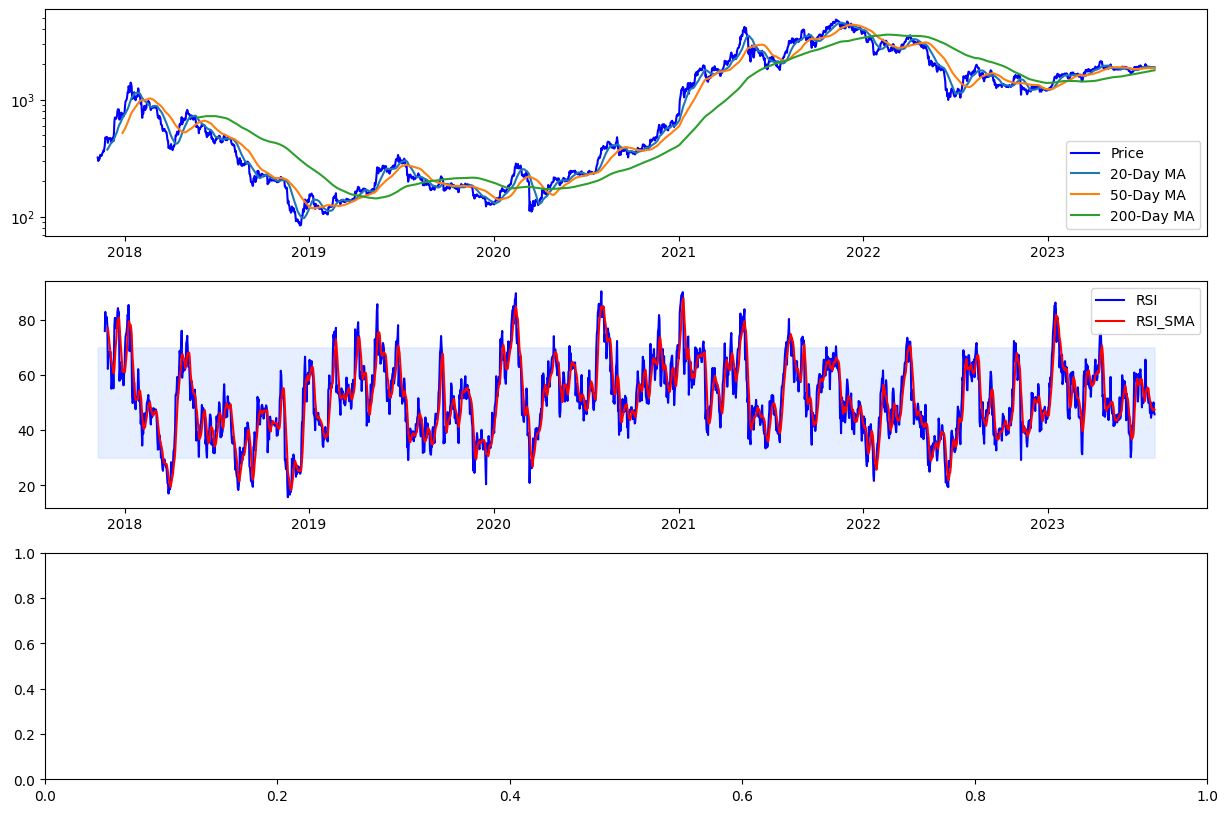

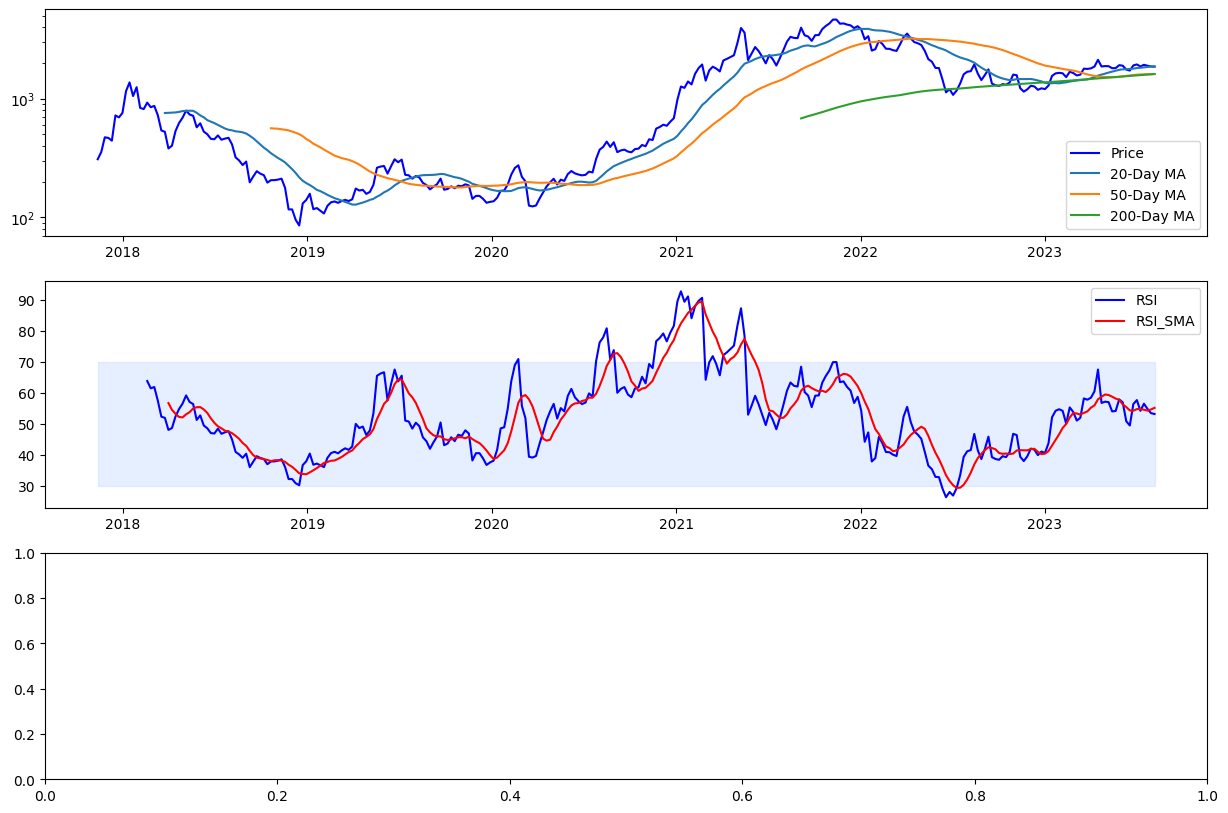

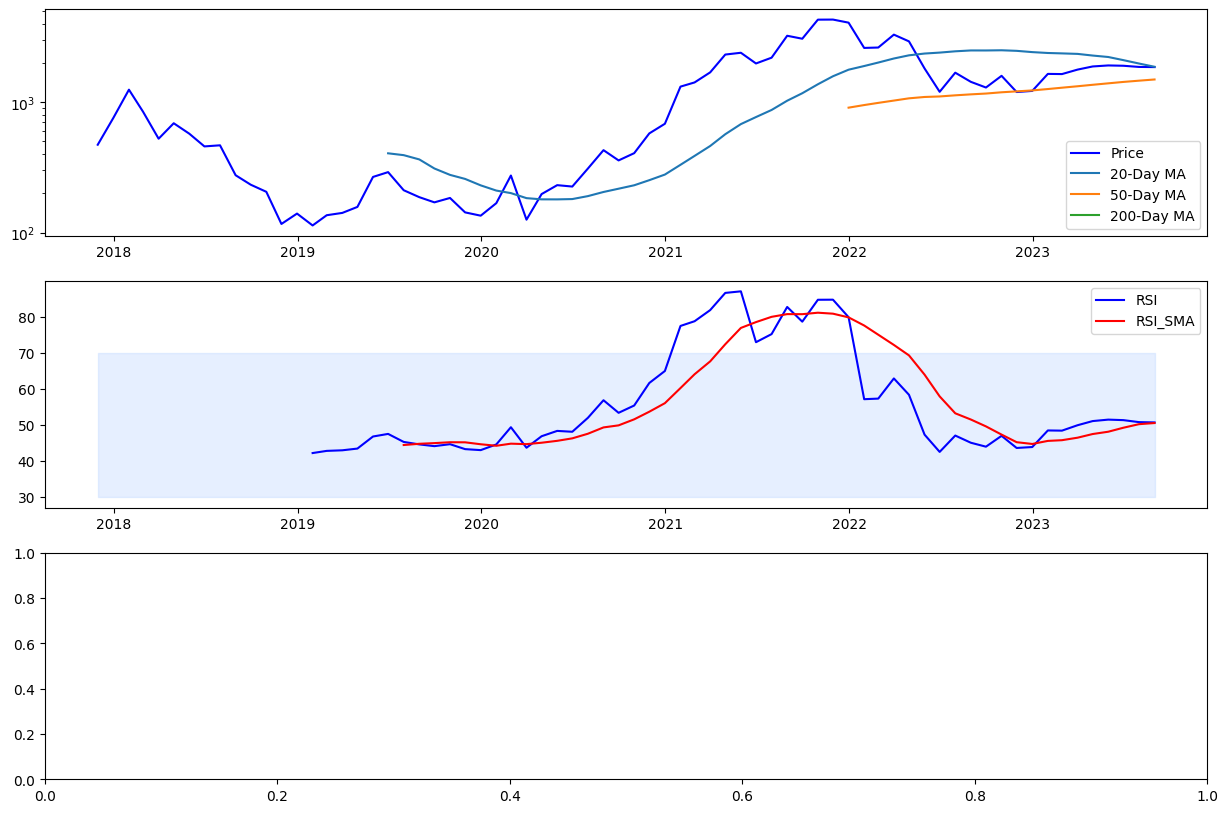

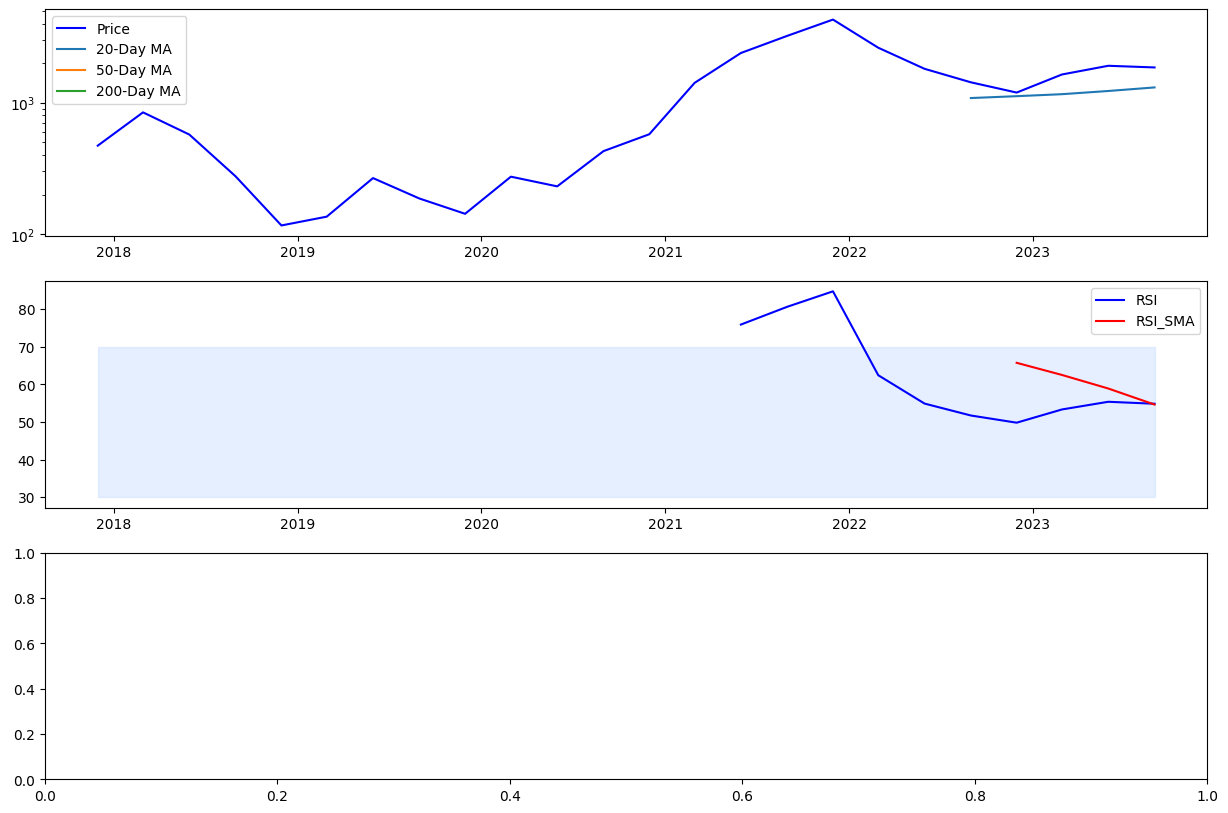

In [ ]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import numpy as np
import talib

# Define start and end dates
start_date = '1950-01-01'
end_date = '2023-08-01'

# Fetch historical data
btc = yf.Ticker("ETH-USD")
hist = btc.history(start=start_date, end=end_date)

# Calculate the moving averages
hist['MA20'] = hist['Close'].rolling(window=20).mean()
hist['MA50'] = hist['Close'].rolling(window=50).mean()
hist['MA200'] = hist['Close'].rolling(window=200).mean()

# Calculate the RSI
hist['RSI'] = talib.RSI(hist['Close'], timeperiod=14)
# Calculate Moving Average of RSI
hist['RSI_SMA'] = hist['RSI'].rolling(window=7).mean()

# Calculate Bollinger Bands
hist['upper_band'], hist['middle_band'], hist['lower_band'] = talib.BBANDS(hist['Close'], timeperiod=20)


# Plotting
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(15,10))

# Plotting moving averages
ax1.semilogy(hist.index, hist['Close'], label='Price', color='blue')
ax1.plot(hist.index, hist['MA20'], label='20-Day MA')
ax1.plot(hist.index, hist['MA50'], label='50-Day MA')
ax1.plot(hist.index, hist['MA200'], label='200-Day MA')
ax1.legend(loc='best')

# Plotting RSI and its moving average
ax2.plot(hist.index, hist['RSI'], label='RSI', color='blue')
ax2.plot(hist.index, hist['RSI_SMA'], label='RSI_SMA', color='red')
ax2.fill_between(hist.index, y1=30, y2=70, color='#adccff', alpha=0.3)
ax2.legend(loc='best')

plt.show()

# Resample to weeks
hist = hist.resample('W').last()

# Calculate the moving averages
hist['MA20'] = hist['Close'].rolling(window=20).mean()
hist['MA50'] = hist['Close'].rolling(window=50).mean()
hist['MA200'] = hist['Close'].rolling(window=200).mean()

# Calculate the RSI
hist['RSI'] = talib.RSI(hist['Close'], timeperiod=14)
# Calculate Moving Average of RSI
hist['RSI_SMA'] = hist['RSI'].rolling(window=7).mean()

# Calculate Bollinger Bands
hist['upper_band'], hist['middle_band'], hist['lower_band'] = talib.BBANDS(hist['Close'], timeperiod=20)

# Plotting
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(15,10))

# Plotting moving averages
ax1.semilogy(hist.index, hist['Close'], label='Price', color='blue')
ax1.plot(hist.index, hist['MA20'], label='20-Day MA')
ax1.plot(hist.index, hist['MA50'], label='50-Day MA')
ax1.plot(hist.index, hist['MA200'], label='200-Day MA')
ax1.legend(loc='best')

# Plotting RSI and its moving average
ax2.plot(hist.index, hist['RSI'], label='RSI', color='blue')
ax2.plot(hist.index, hist['RSI_SMA'], label='RSI_SMA', color='red')
ax2.fill_between(hist.index, y1=30, y2=70, color='#adccff', alpha=0.3)
ax2.legend(loc='best')

plt.show()


# Resample to month
hist = hist.resample('M').last()

# Calculate the moving averages
hist['MA20'] = hist['Close'].rolling(window=20).mean()
hist['MA50'] = hist['Close'].rolling(window=50).mean()
hist['MA200'] = hist['Close'].rolling(window=200).mean()

# Calculate the RSI
hist['RSI'] = talib.RSI(hist['Close'], timeperiod=14)
# Calculate Moving Average of RSI
hist['RSI_SMA'] = hist['RSI'].rolling(window=7).mean()

# Calculate Bollinger Bands
hist['upper_band'], hist['middle_band'], hist['lower_band'] = talib.BBANDS(hist['Close'], timeperiod=20)

# Plotting
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(15,10))

# Plotting moving averages
ax1.semilogy(hist.index, hist['Close'], label='Price', color='blue')
ax1.plot(hist.index, hist['MA20'], label='20-Day MA')
ax1.plot(hist.index, hist['MA50'], label='50-Day MA')
ax1.plot(hist.index, hist['MA200'], label='200-Day MA')
ax1.legend(loc='best')

# Plotting RSI and its moving average
ax2.plot(hist.index, hist['RSI'], label='RSI', color='blue')
ax2.plot(hist.index, hist['RSI_SMA'], label='RSI_SMA', color='red')
ax2.fill_between(hist.index, y1=30, y2=70, color='#adccff', alpha=0.3)
ax2.legend(loc='best')

plt.show()



# Resample to 3 Months
hist = hist.resample('3M').last()

# Calculate the moving averages
hist['MA20'] = hist['Close'].rolling(window=20).mean()
hist['MA50'] = hist['Close'].rolling(window=50).mean()
hist['MA200'] = hist['Close'].rolling(window=200).mean()

# Calculate the RSI
hist['RSI'] = talib.RSI(hist['Close'], timeperiod=14)
# Calculate Moving Average of RSI
hist['RSI_SMA'] = hist['RSI'].rolling(window=7).mean()

# Calculate Bollinger Bands
hist['upper_band'], hist['middle_band'], hist['lower_band'] = talib.BBANDS(hist['Close'], timeperiod=20)

# Plotting
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(15,10))

# Plotting moving averages
ax1.semilogy(hist.index, hist['Close'], label='Price', color='blue')
ax1.plot(hist.index, hist['MA20'], label='20-Day MA')
ax1.plot(hist.index, hist['MA50'], label='50-Day MA')
ax1.plot(hist.index, hist['MA200'], label='200-Day MA')
ax1.legend(loc='best')

# Plotting RSI and its moving average
ax2.plot(hist.index, hist['RSI'], label='RSI', color='blue')
ax2.plot(hist.index, hist['RSI_SMA'], label='RSI_SMA', color='red')
ax2.fill_between(hist.index, y1=30, y2=70, color='#adccff', alpha=0.3)
ax2.legend(loc='best')

plt.show()





**filtering BY THE MONTH** Average Return by Day Throughout the Years
Average Return by Week of the Month

The week of the month with the lowest average return for the asset is: 3.0
The identified week is the lowest return week in 60.0% of the years.
The day of the month with the lowest average return for the asset is: 17
The identified day is the lowest return day in 0.0% of the weeks.


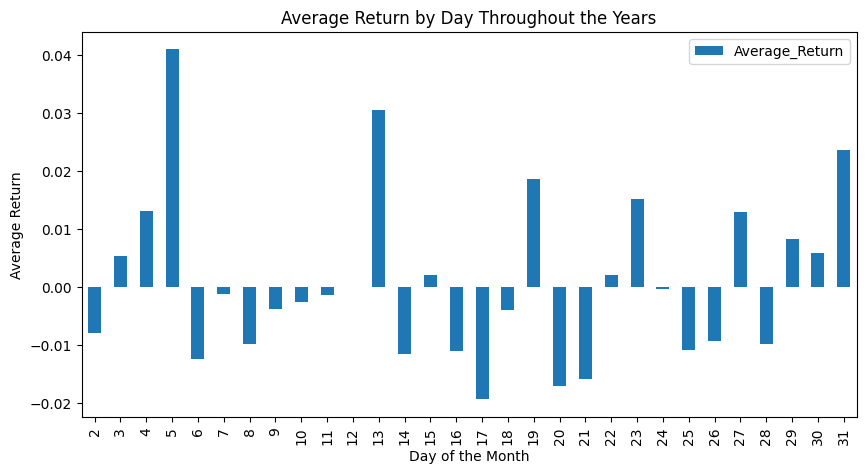

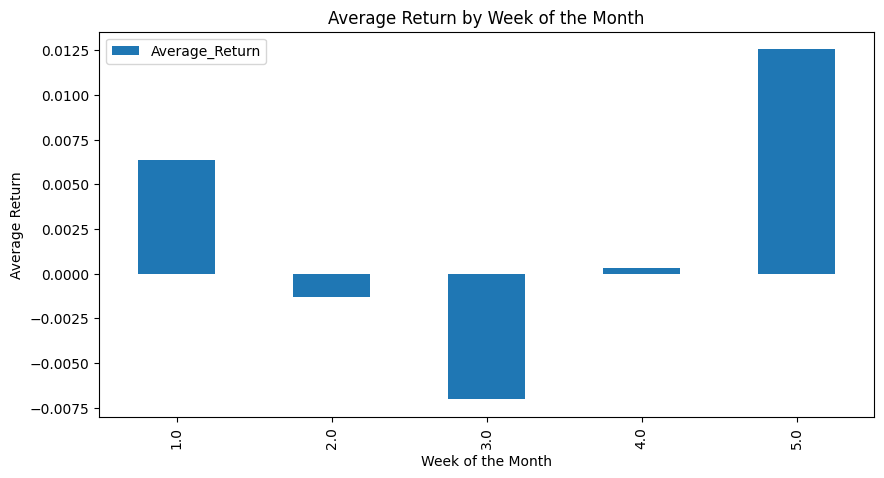

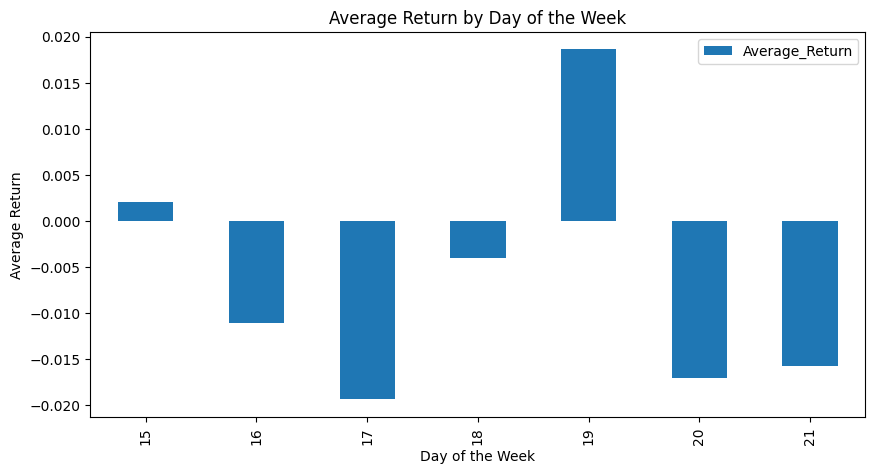

In [ ]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import numpy as np

# Define start and end dates
start_date = '1950-01-01'
end_date = '2023-07-01'

# Define the specific month you are interested in (1=January, 2=February, ..., 12=December)
specific_month = 8  # CHOOSE A MONTH

# Fetch historical data
btc = yf.Ticker("ETH-USD")
hist = btc.history(start=start_date, end=end_date)

# Filter for the specific month
hist = hist[hist.index.month == specific_month]

# Calculate daily returns
hist['Return'] = hist['Close'].pct_change()

# Calculate week of month
hist['Week_of_Month'] = np.ceil(hist.index.day/7)

# Remove outliers based on the IQR
Q1 = hist['Return'].quantile(0.25)
Q3 = hist['Return'].quantile(0.75)
IQR = Q3 - Q1

filter_outliers = (hist['Return'] >= Q1 - 1.5*IQR) & (hist['Return'] <= Q3 + 1.5*IQR)
hist = hist.loc[filter_outliers]

# Create a new dataframe to hold the average return for each day throughout the years
average_return_all_days = pd.DataFrame()

# Group by day and calculate average return
average_return_all_days['Average_Return'] = hist.groupby(hist.index.day)['Return'].mean()

# Create a new dataframe to hold the average return for each week of the month
average_return_per_week = pd.DataFrame()

# Group by week of month and calculate average return
average_return_per_week['Average_Return'] = hist.groupby(hist['Week_of_Month'])['Return'].mean()

# Find the week with the lowest average return
lowest_avg_return_week = average_return_per_week['Average_Return'].idxmin()

print(f"The week of the month with the lowest average return for the asset is: {lowest_avg_return_week}")

# Find percentage confirmation for the week
years = hist.index.year.unique()
confirmed_years_week = 0
total_years = 0
for year in years:
    hist_year = hist[hist.index.year == year]
    if not hist_year.empty and hist_year.loc[hist_year['Return'].idxmin(),'Week_of_Month'] == lowest_avg_return_week:
        confirmed_years_week += 1
    if not hist_year.empty:
        total_years += 1

percentage_confirmation_week = (confirmed_years_week / total_years) * 100

print(f"The identified week is the lowest return week in {percentage_confirmation_week}% of the years.")

# Create a new dataframe to hold the average return for each day of the week
average_return_per_day = pd.DataFrame()

# Filter for the specific week
hist_week = hist[hist['Week_of_Month'] == lowest_avg_return_week]

# Group by day of the week and calculate average return
average_return_per_day['Average_Return'] = hist_week.groupby(hist_week.index.day)['Return'].mean()

# Find the day with the lowest average return
lowest_avg_return_day = average_return_per_day['Average_Return'].idxmin()

print(f"The day of the month with the lowest average return for the asset is: {lowest_avg_return_day}")

# Find percentage confirmation for the day
confirmed_days = 0
total_days = 0
for week in hist_week['Week_of_Month'].unique():
    hist_day = hist_week[hist_week['Week_of_Month'] == week]
    if not hist_day.empty and hist_day['Return'].idxmin().day == lowest_avg_return_day:
        confirmed_days += 1
    if not hist_day.empty:
        total_days += 1

percentage_confirmation_day = (confirmed_days / total_days) * 100

print(f"The identified day is the lowest return day in {percentage_confirmation_day}% of the weeks.")

# Plot the data for all days throughout the years
average_return_all_days.plot(kind='bar', figsize=(10, 5))
plt.title('Average Return by Day Throughout the Years')
plt.xlabel('Day of the Month')
plt.ylabel('Average Return')
plt.show()

# Plot the data for each week of the month
average_return_per_week.plot(kind='bar', figsize=(10, 5))
plt.title('Average Return by Week of the Month')
plt.xlabel('Week of the Month')
plt.ylabel('Average Return')
plt.show()

# Plot the data for each day of the specific week
average_return_per_day.plot(kind='bar', figsize=(10, 5))
plt.title('Average Return by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Average Return')
plt.show()
